In [16]:
import numpy as np
from bidict import bidict

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [17]:
ENCODER = bidict({
    'ა': 1, 'ბ': 2, 'გ': 3, 'დ': 4, 'ე': 5, 'ვ': 6,
    'ზ': 7, 'თ': 8, 'ი': 9, 'კ': 10, 'ლ': 11, 'მ': 12,
    'ნ': 13, 'ო': 14, 'პ': 15, 'ჟ': 16, 'რ': 17, 'ს': 18,
    'ტ': 19, 'უ': 20, 'ფ': 21, 'ქ': 22, 'ღ': 23, 'ყ': 24,
    'შ': 25, 'ჩ': 26,'ც':27, 'ძ':28, 'წ':29, 'ჭ':30, 'ხ':31, 'ჯ':32, 'ჰ': 33
})

In [18]:
labels = np.load('../data/geo_labels.npy')
labels = np.array([ENCODER[x] for x in labels])

In [19]:
imgs = np.load('../data/geo_images.npy')
imgs = imgs.astype("float32") / 255

ა


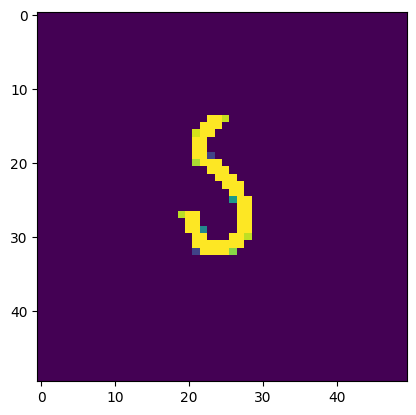

In [23]:
print(ENCODER.inverse[labels[0]])
plt.figure()
plt.imshow(imgs[0])
plt.grid(False)
plt.show()

In [24]:
imgs = np.expand_dims(imgs,-1)

In [25]:
imgs.shape

(341, 50, 50, 1)

In [26]:
labels, imgs = shuffle(labels, imgs)
split = .75
labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [27]:
batch_size = 16
epochs = 20
model = keras.Sequential([
    keras.Input(shape=(50,50,1)),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

In [28]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [29]:
model.fit(imgs_train, labels_train, batch_size=batch_size, epochs=epochs, validation_data=(imgs_test, labels_test), callbacks=[early_stopping])

Epoch 1/20
16/16 [==============================] - 2s 50ms/step - loss: 3.4378 - accuracy: 0.0706 - val_loss: 3.3031 - val_accuracy: 0.1279
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 2.4975 - accuracy: 0.3490 - val_loss: 2.2420 - val_accuracy: 0.3256
Epoch 3/20
16/16 [==============================] - 0s 31ms/step - loss: 1.3751 - accuracy: 0.6000 - val_loss: 2.3073 - val_accuracy: 0.3372
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.9287 - accuracy: 0.6941 - val_loss: 1.9582 - val_accuracy: 0.5349
Epoch 5/20
16/16 [==============================] - 0s 31ms/step - loss: 0.7350 - accuracy: 0.7451 - val_loss: 1.9521 - val_accuracy: 0.5000
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.4075 - accuracy: 0.8706 - val_loss: 1.9057 - val_accuracy: 0.6163
Epoch 7/20
16/16 [==============================] - 1s 33ms/step - loss: 0.2491 - accuracy: 0.9333 - val_loss: 2.0715 - val_accuracy: 0.5581
Epoch 8/20
16

In [30]:
labels_pred = np.argmax(model.predict(imgs_test), axis=1)

3/3 [==============================] - 0s 8ms/step


In [31]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

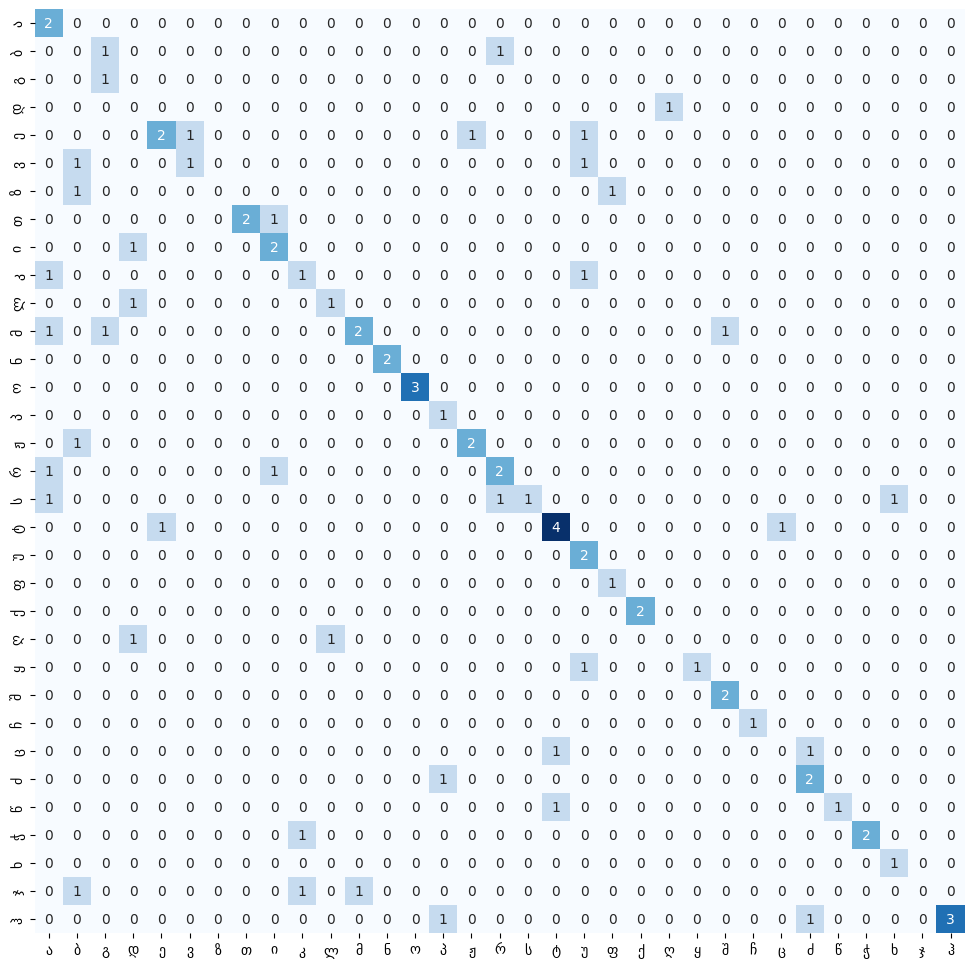

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, cbar=False, cmap='Blues', xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [33]:
model.save('geo_model.model',save_format='h5')